## Objetivo:

Entender las tendencias y relación de los nacimientos de bebés en Estados Unidos teniendo como referencia variables categóricas como: Estado, Año, Género, Nivel de educación de la madre, Edad promedio de la madre.
Variables continuas como: Número de nacimientos y Peso promedio del bebé

### La página es de Centers for Disease Control and Prevention (CDC)
https://wonder.cdc.gov/natality-current.html

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
!pip install plotly -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
!pip install dash

In [ ]:
!pip install dash-core-components

In [ ]:
!pip install dash-html-components

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")

In [ ]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelPerey96/Proyect-Births_USA_from_2016-2021/main/us_births_2016_2021.csv')
df

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,"5,496.00","5,496.00","5,496.00","5,496.00","5,496.00"
mean,"2,018.50",3.03,"4,115.44",29.55,"3,250.89"
std,1.71,4.73,"6,687.04",2.78,114.46
min,"2,016.00",-9.00,10.00,23.10,"2,451.90"
25%,"2,017.00",2.00,559.00,27.50,"3,182.20"
50%,"2,019.00",4.00,"1,692.00",29.60,"3,256.00"
75%,"2,020.00",6.00,"5,140.00",31.80,"3,330.83"
max,"2,021.00",8.00,"59,967.00",35.50,"3,585.70"


In [ ]:
df.shape

(5496, 9)

In [ ]:
df['State'].value_counts()

Alabama                 108
Alaska                  108
New Hampshire           108
New Jersey              108
New Mexico              108
New York                108
North Carolina          108
North Dakota            108
Ohio                    108
Oklahoma                108
Oregon                  108
Pennsylvania            108
Rhode Island            108
South Carolina          108
South Dakota            108
Tennessee               108
Texas                   108
Utah                    108
Vermont                 108
Virginia                108
Washington              108
West Virginia           108
Wisconsin               108
Nevada                  108
Missouri                108
Mississippi             108
Idaho                   108
Arizona                 108
Arkansas                108
California              108
Colorado                108
Connecticut             108
Delaware                108
District of Columbia    108
Florida                 108
Georgia             

In [ ]:
df.rename(columns={'State Abbreviation':'state_abbr',
                   'Education Level of Mother':'Education_level',
                   'Education Level Code':'Education_code',
                   'Number of Births':'Num_of_births',
                   'Average Age of Mother (years)':'Avg_age_mother',
                   'Average Birth Weight (g)':'Avg_Weight'},inplace = True)

In [ ]:
df['Education_level'] = df['Education_level'].replace({'8th grade or less':'Middle school',
                                                       '9th through 12th grade with no diploma':'High school drop out',
                                                       'Associate degree (AA, AS)':'Associates',
                                                       'Bachelor\'s degree (BA, AB, BS)':'Bachelor\'s',
                                                       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)':'Phd',
                                                       'High school graduate or GED completed':'High school',
                                                       'Master\'s degree (MA, MS, MEng, MEd, MSW, MBA)':'Master\s',
                                                       'Some college credit, but not a degree':'Some college'})

## Nivel de educación de la Madre


1.   Middle School = Intermedio entre primaria y secundaria (México)
2.	High school drop out = No termino la preparatoria
3.	High school = Preparatoria completa
4.	Some college = Algunos créditos universitarios
5.	Associates = Carrera técnica
6.	Bachelor\'s = Título universitario
7.	Master\s = Maestria
8.	Phd = Doctorado
9.	Unknown or Not Stated = Desconocido o no establecido




In [ ]:
df.head()

,State,state_abbr,Year,Gender,Education_level,Education_code,Num_of_births,Avg_age_mother,Avg_Weight
0,Alabama,AL,2016,F,Middle school,1,1052,27.80,"3,116.90"
1,Alabama,AL,2016,F,High school drop out,2,3436,24.10,"3,040.00"
2,Alabama,AL,2016,F,High school,3,8777,25.40,"3,080.00"
3,Alabama,AL,2016,F,Some college,4,6453,26.70,"3,121.90"
4,Alabama,AL,2016,F,Associates,5,2227,28.90,"3,174.30"


In [ ]:
 df.loc[(df['State'] == 'Alabama') & (df['Year'] == 2016) & (df['Gender'] == 'F')]


,State,state_abbr,Year,Gender,Education_level,Education_code,Num_of_births,Avg_age_mother,Avg_Weight
0,Alabama,AL,2016,F,Middle school,1,1052,27.80,"3,116.90"
1,Alabama,AL,2016,F,High school drop out,2,3436,24.10,"3,040.00"
2,Alabama,AL,2016,F,High school,3,8777,25.40,"3,080.00"
3,Alabama,AL,2016,F,Some college,4,6453,26.70,"3,121.90"
4,Alabama,AL,2016,F,Associates,5,2227,28.90,"3,174.30"
5,Alabama,AL,2016,F,Bachelor's,6,4453,30.30,"3,239.00"
6,Alabama,AL,2016,F,Master\s,7,1910,32.00,"3,263.50"
7,Alabama,AL,2016,F,Phd,8,487,33.10,"3,196.70"
8,Alabama,AL,2016,F,Unknown or Not Stated,-9,65,27.70,"3,083.90"


In [ ]:
df.head(18)

,State,state_abbr,Year,Gender,Education_level,Education_code,Num_of_births,Avg_age_mother,Avg_Weight
0,Alabama,AL,2016,F,Middle school,1,1052,27.80,"3,116.90"
1,Alabama,AL,2016,F,High school drop out,2,3436,24.10,"3,040.00"
2,Alabama,AL,2016,F,High school,3,8777,25.40,"3,080.00"
3,Alabama,AL,2016,F,Some college,4,6453,26.70,"3,121.90"
4,Alabama,AL,2016,F,Associates,5,2227,28.90,"3,174.30"
5,Alabama,AL,2016,F,Bachelor's,6,4453,30.30,"3,239.00"
6,Alabama,AL,2016,F,Master\s,7,1910,32.00,"3,263.50"
7,Alabama,AL,2016,F,Phd,8,487,33.10,"3,196.70"
8,Alabama,AL,2016,F,Unknown or Not Stated,-9,65,27.70,"3,083.90"
9,Alabama,AL,2016,M,Middle school,1,1188,27.60,"3,232.90"


In [ ]:
 Alabama_mweight_boys = df.loc[(df['State'] == 'Alabama') & (df['Gender'] == 'M')].mean()
 Alabama_mweight_boys

<ipython-input-19-0c93cc46143c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Alabama_mweight_boys = df.loc[(df['State'] == 'Alabama') & (df['Gender'] == 'M')].mean()


Year             2,018.50
Education_code       3.00
Num_of_births    3,319.59
Avg_age_mother      28.55
Avg_Weight       3,246.81
dtype: float64

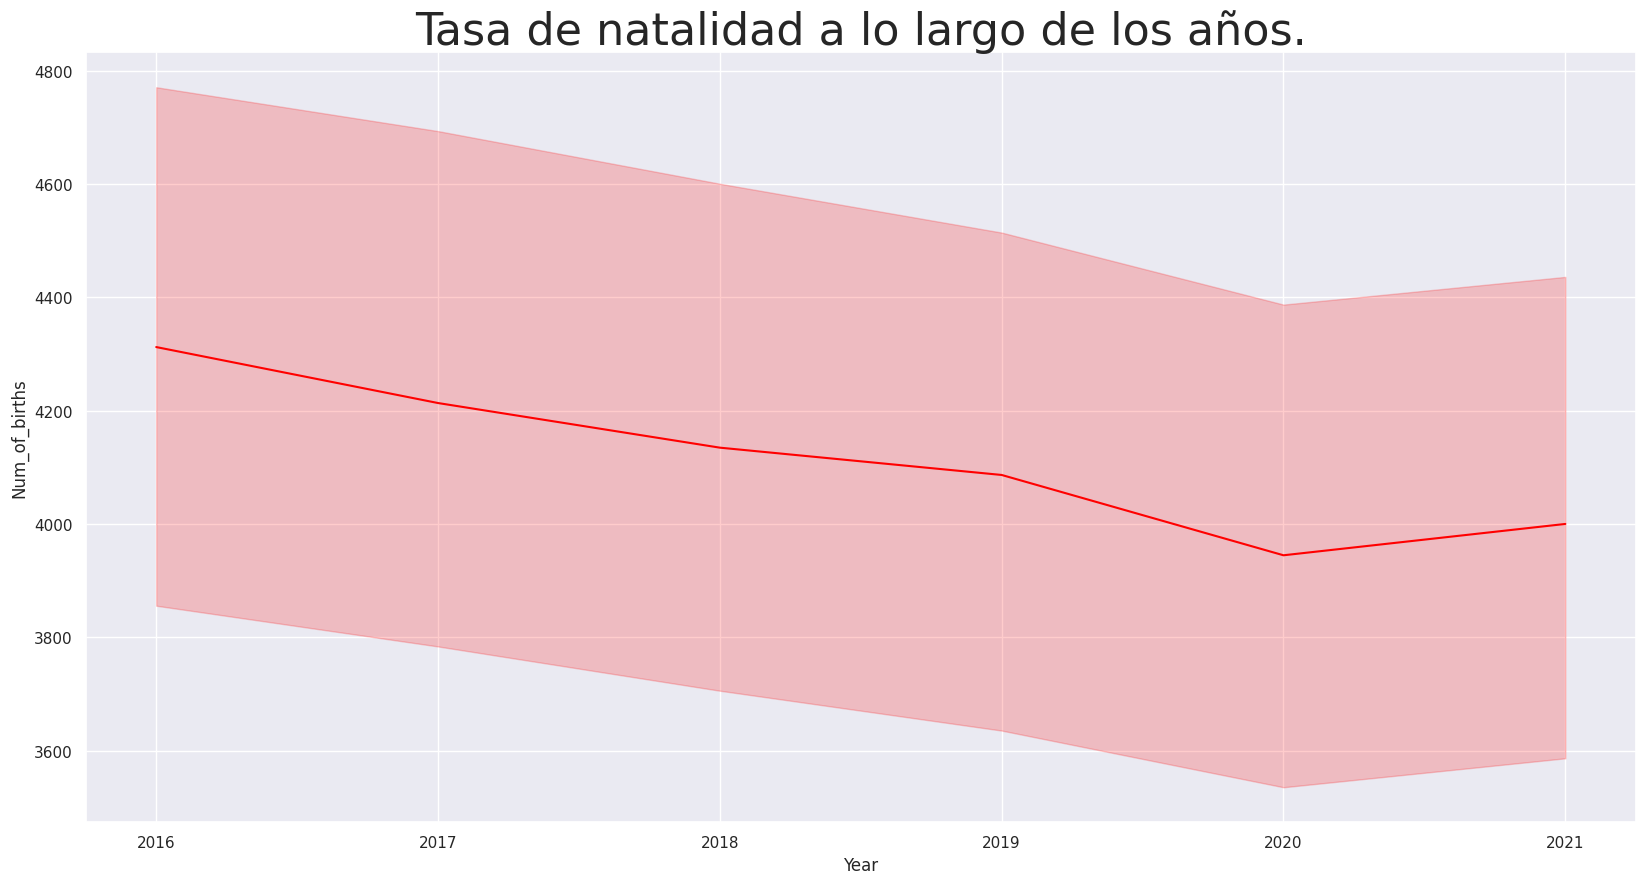

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year',y='Num_of_births',data =df, color = 'red');
plt.title('Tasa de natalidad a lo largo de los años.', fontsize=32);

La tasa de natalidad en los Estados Unidos ha disminuido constantemente desde 2016. Hubo un pequeño aumento en 2020, pero la tendencia general es a la baja.

In [ ]:
df.columns

Index(['State', 'state_abbr', 'Year', 'Gender', 'Education_level',
       'Education_code', 'Num_of_births', 'Avg_age_mother', 'Avg_Weight'],
      dtype='object')

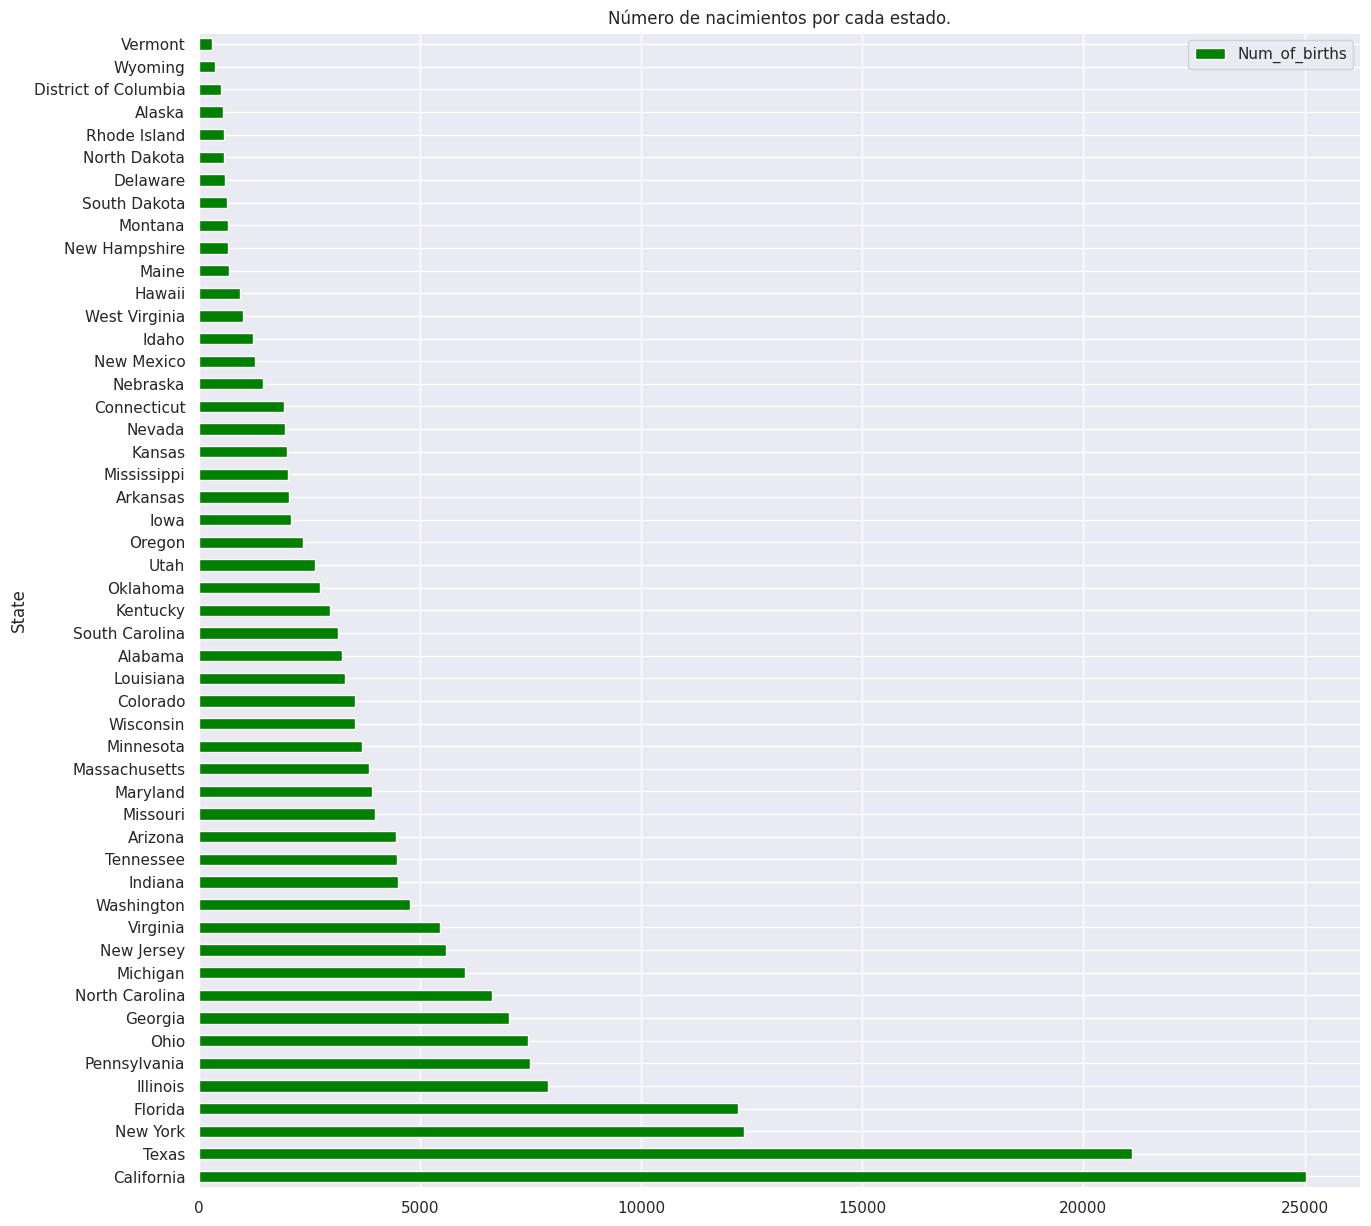

In [40]:
df.groupby('State').agg({'Num_of_births':'mean'}).sort_values(by='Num_of_births',ascending = False).round(0)\
    .plot(kind = 'barh',figsize=(15,15),title = 'Número de nacimientos por cada estado.', color='green');

In [ ]:
import plotly.express as px

df_state = df.groupby('State').agg({'Num_of_births': 'mean'}).sort_values(by='Num_of_births', ascending=False).round(0)
fig = px.bar(df_state, y=df_state.index, x='Num_of_births', orientation='h')
fig.update_layout(
    title='Número de nacimientos por cada estado.',
    title_font=dict(size=32),
    width=900,
    height=600,
    yaxis=dict(title='State'),
    xaxis=dict(title='Num_of_births', range=[0, df_state['Num_of_births'].max() + 100])
)
fig.show()

# Los estados con más nacimientos son:

1.   California (Republicano)
2.   Texas(Demócrata)
3.   Nueva York (Demócrata)
4.   Florida (Demócrata)
5.   Illinois (Republicano)

# Los estados con menor número de nacimientos:

1.   Vermont(Republicano)
2.   Wyoming(Republicano)
3.   Distrito de Columbia(Demócrata)
4.   Alaska(Demócrata)
5.   Rhode Island(Demócrata)






In [ ]:
df.tail()

,State,state_abbr,Year,Gender,Education_level,Education_code,Num_of_births,Avg_age_mother,Avg_Weight
5491,Wyoming,WY,2021,M,Associates,5,401,29.20,"3,261.10"
5492,Wyoming,WY,2021,M,Bachelor's,6,657,30.70,"3,286.00"
5493,Wyoming,WY,2021,M,Master\s,7,261,33.00,"3,249.30"
5494,Wyoming,WY,2021,M,Phd,8,72,33.30,"3,262.00"
5495,Wyoming,WY,2021,M,Unknown or Not Stated,-9,41,29.20,"3,177.50"


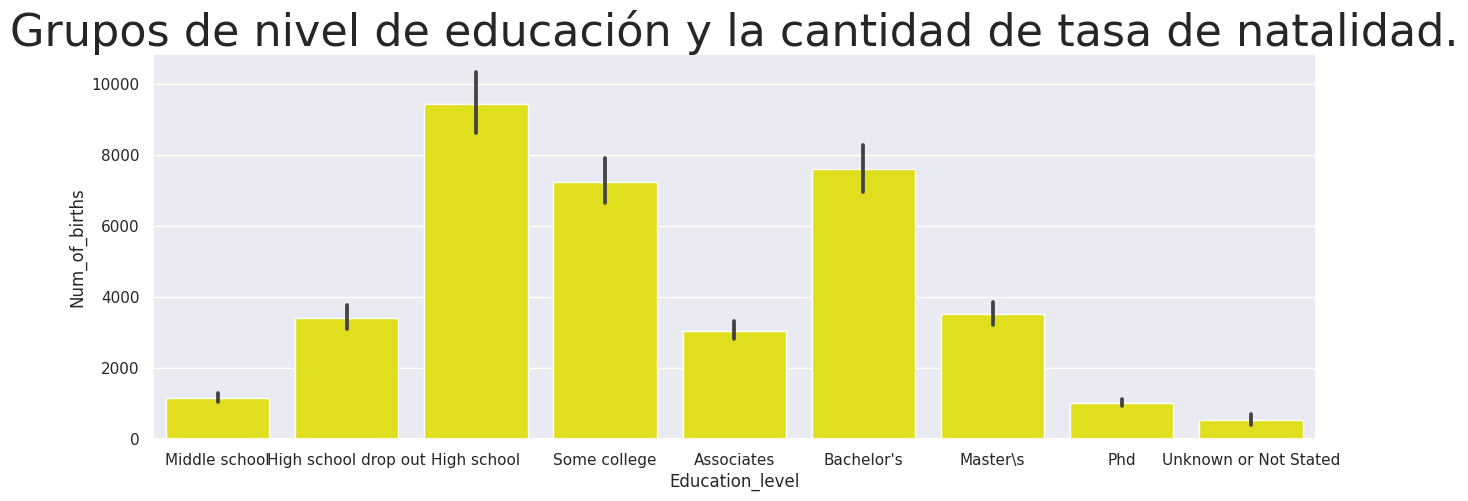

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='Education_level',y='Num_of_births',data = df,color = 'yellow');
plt.title('Grupos de nivel de educación y la cantidad de tasa de natalidad.', fontsize = 32);

In [ ]:
import plotly.express as px

fig = px.bar(df, x='Education_level', y='Num_of_births', color='Education_level')
fig.update_layout(
    title='Grupos de nivel de educación y la cantidad de tasa de natalidad.',
    title_font=dict(size=32),
    width=900,
    height=500,
    xaxis=dict(title='Education_level'),
    yaxis=dict(title='Num_of_births')
)
fig.show()


La mayoría de las madres en los Estados Unidos tienen al menos un diploma de escuela secundaria y un gran número tiene alguna educación universitaria. Aunque los datos con mayor concentración se encuentran solo el nivel de Preparatoria

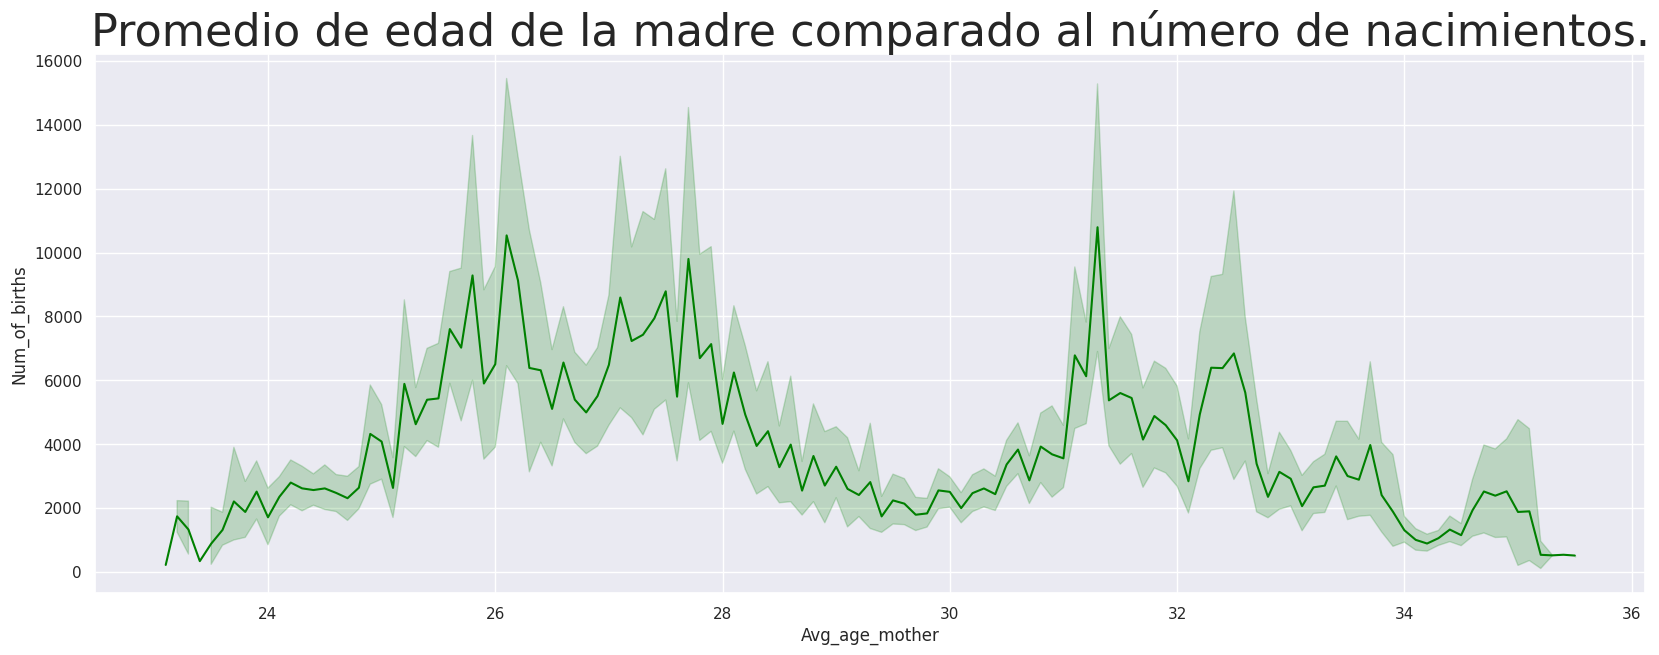

In [44]:
plt.figure(figsize=(20,7))
sns.lineplot(x='Avg_age_mother',y='Num_of_births',data = df, color = 'green');
plt.title('Promedio de edad de la madre comparado al número de nacimientos.', fontsize = 32);

El mayor rango de edad de la madre con más nacimientos es entre los 26 y los 32 años.

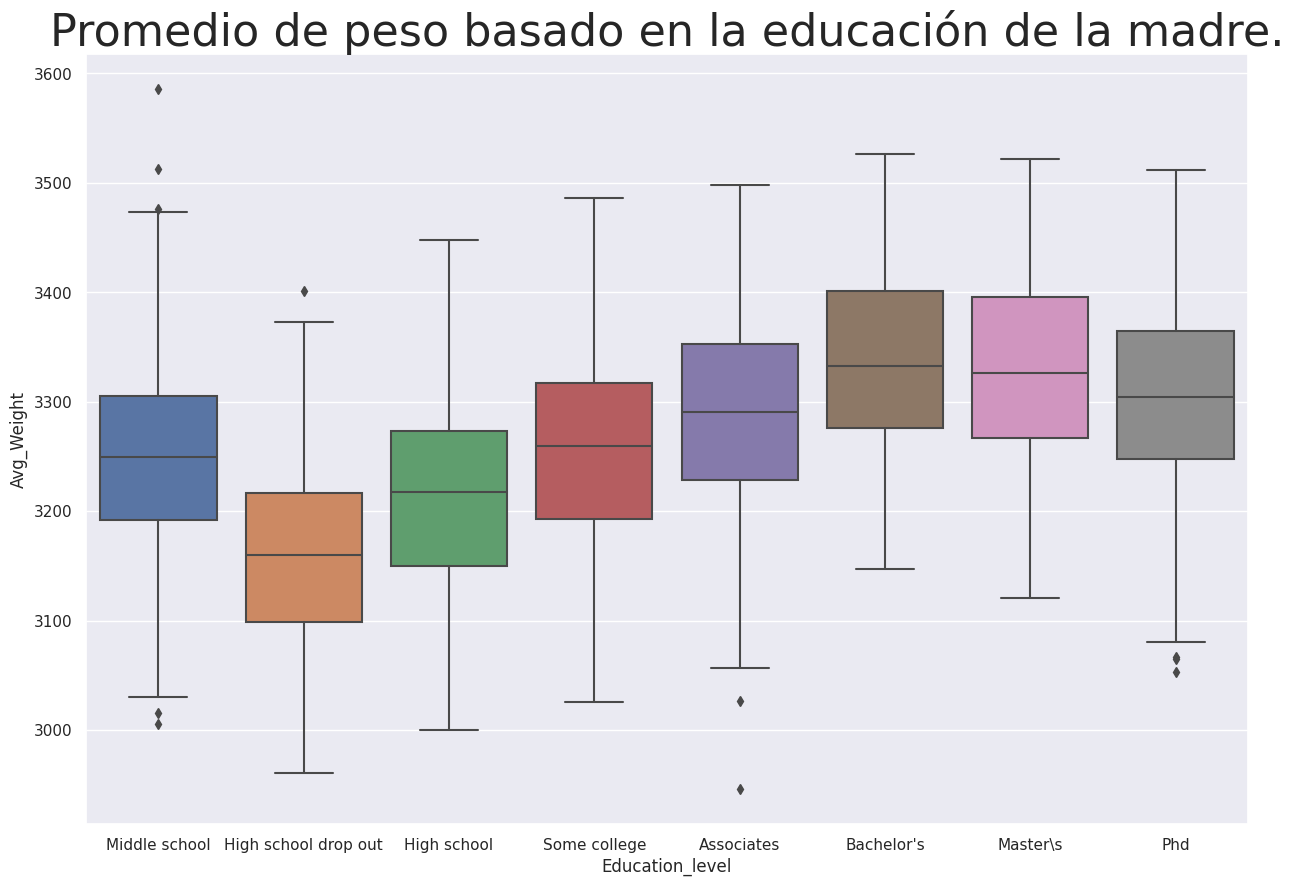

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Education_level',y='Avg_Weight',data = df[df['Education_level']!='Unknown or Not Stated']);
plt.title('Promedio de peso basado en la educación de la madre.', fontsize = 32);

In [ ]:
df.columns

Index(['State', 'state_abbr', 'Year', 'Gender', 'Education_level',
       'Education_code', 'Num_of_births', 'Avg_age_mother', 'Avg_Weight'],
      dtype='object')

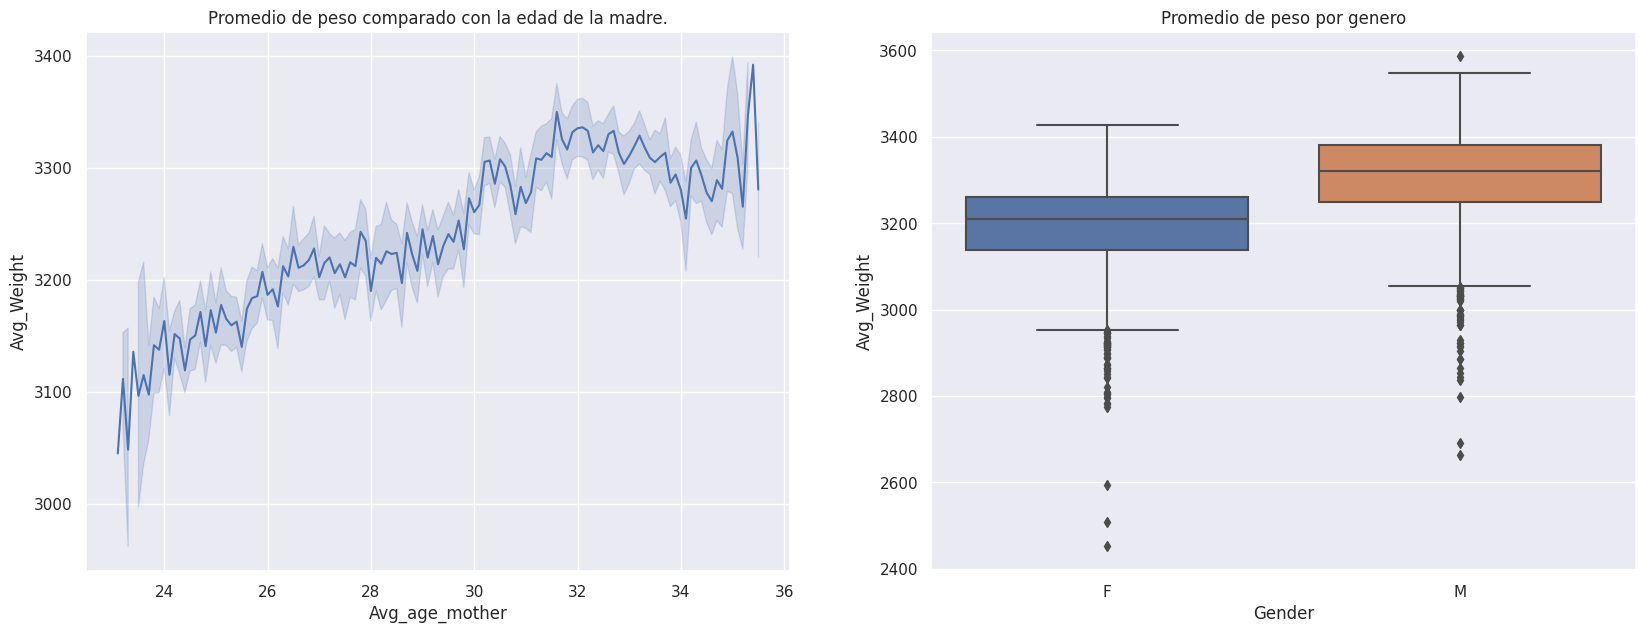

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(20,7))

sns.lineplot(ax=axes[0],x='Avg_age_mother',y='Avg_Weight',data = df);
sns.boxplot(ax=axes[1],x='Gender',y='Avg_Weight',data = df);

axes[0].title.set_text('Promedio de peso comparado con la edad de la madre.')
axes[1].title.set_text('Promedio de peso por genero')

El peso promedio de un bebé femenino es de alrededor de 3200 gramos y el de un bebé masculino es de 3300 gramos. Como también entre mayor es el promedio de edad de la madre mayor es el peso promedio del bebé

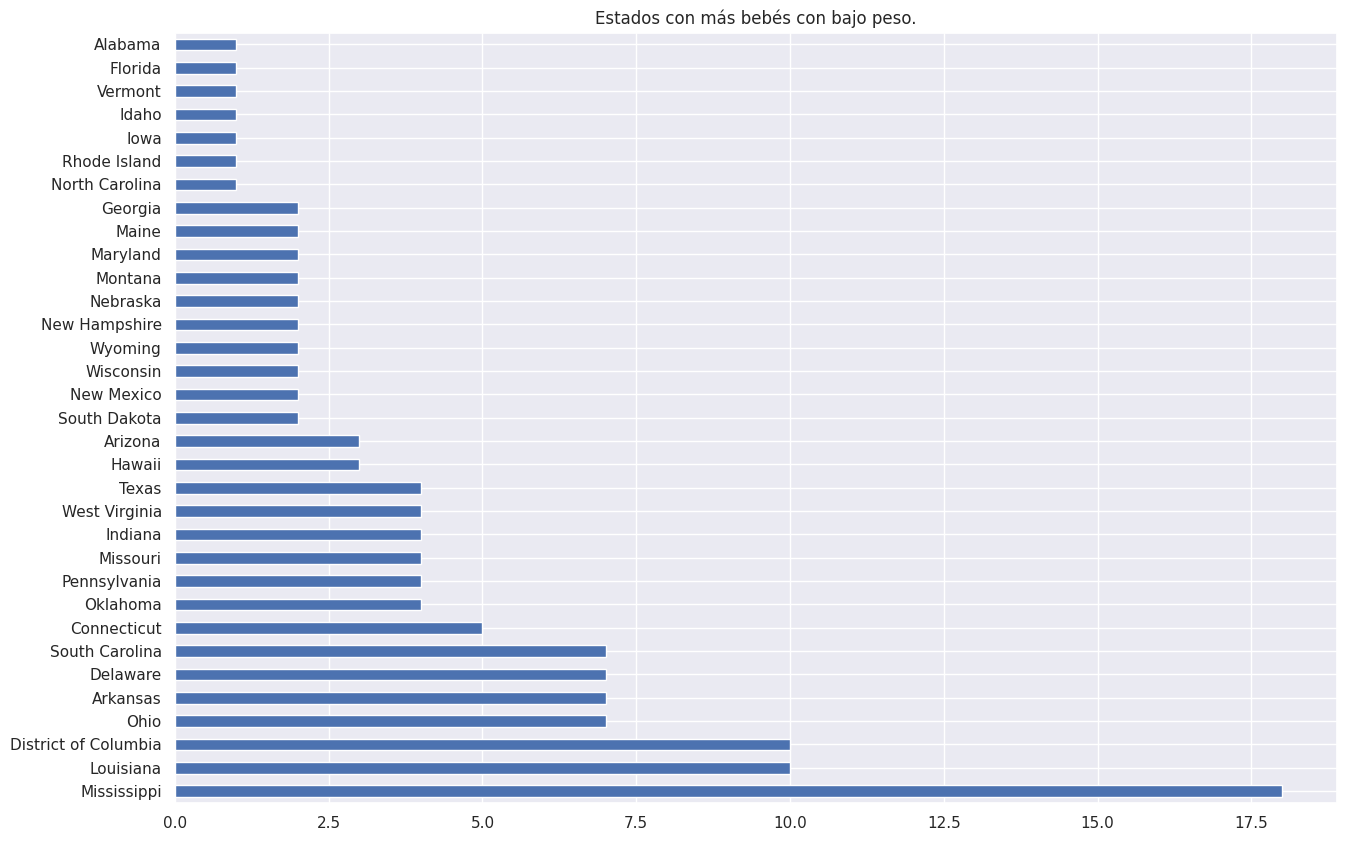

In [ ]:
under_weight = df[df['Avg_Weight']<3000]
under_weight['State'].value_counts().plot(kind = 'barh',
                            figsize=(15,10),title = 'Estados con más bebés con bajo peso.');

# Los estados con más bebés con bajo peso son:

1.   Mississippi(Demócrata)
2.   Louisiana(Demócrata)
3.   Arkansas(Demócrata)
4.   Carolina del Sur(Demócrata)
5.   Ohio(Demócrata)



<Figure size 3200x7000 with 0 Axes>

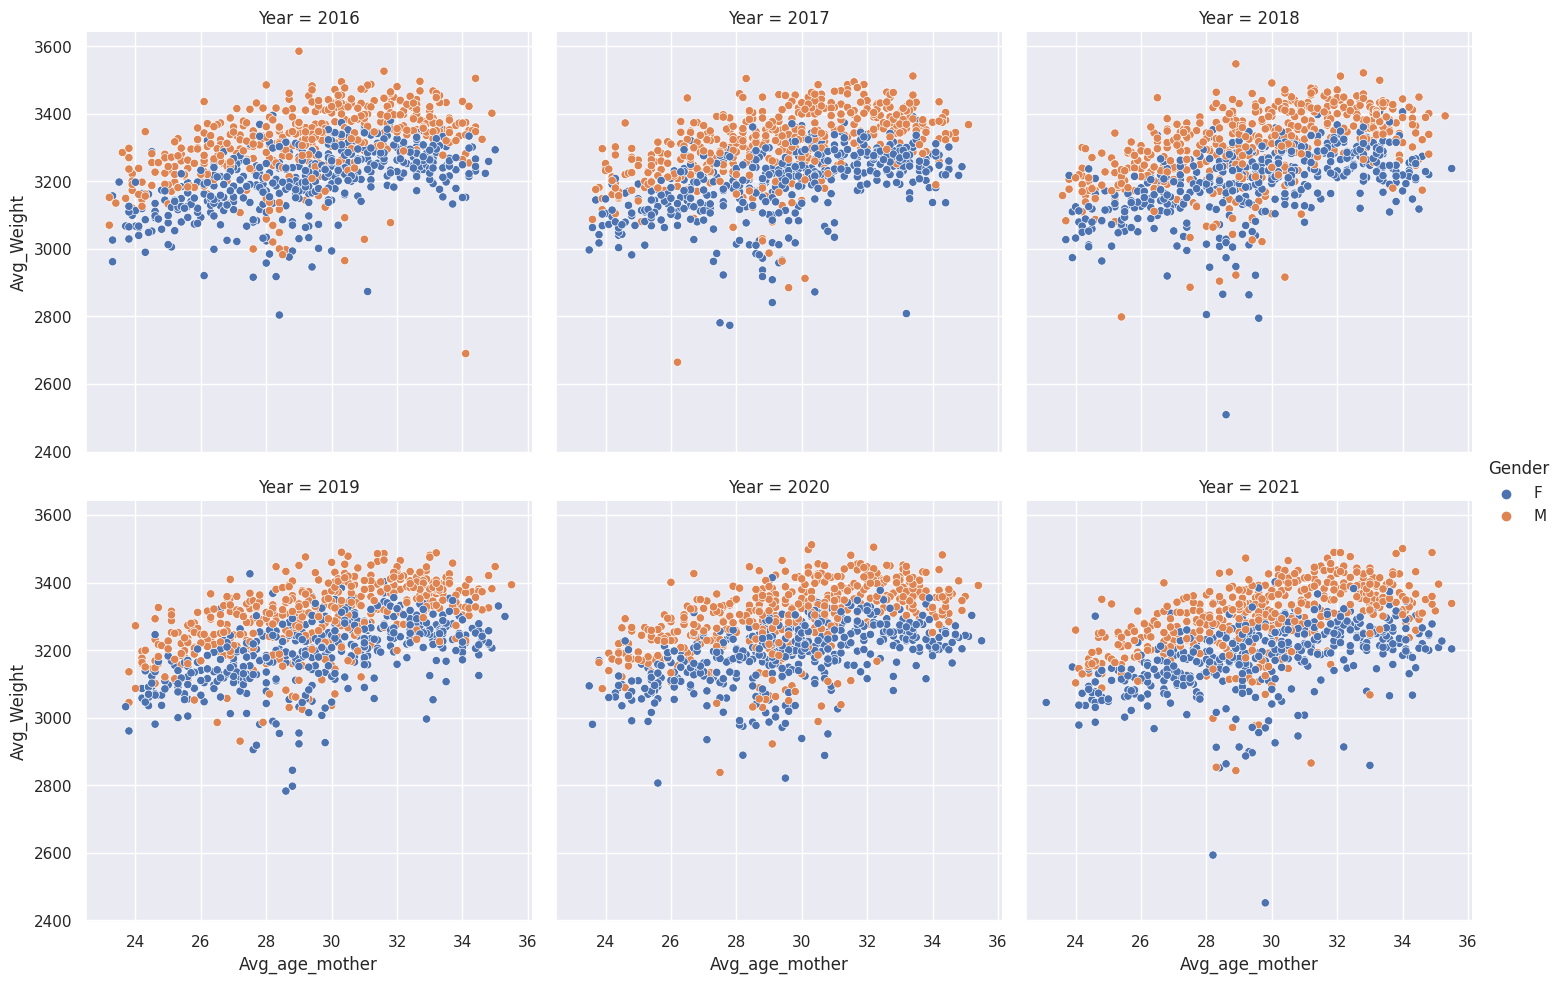

In [ ]:
plt.figure(figsize=(32,70))
sns.relplot(x="Avg_age_mother", y="Avg_Weight", hue="Gender", data=df, col='Year', col_wrap=3);


La tendencia se mantiene pero con cada año transcurrido se aprecia que empieza a ver más bebés que nacen debajo del peso estandar y cada vez se alejan de la concentración

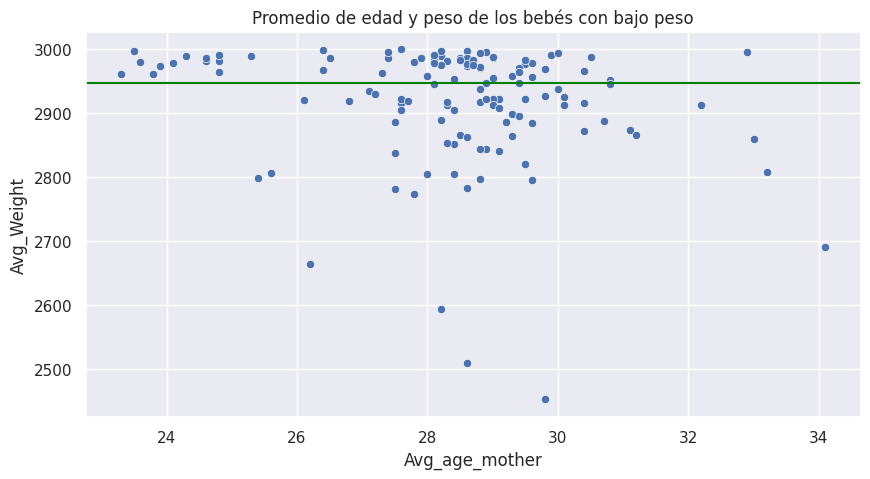

In [ ]:
fig, ax = plt.subplots(figsize=(10,5));

ax.axhline(y=under_weight['Avg_Weight'].median(), color='green');
sns.scatterplot(x='Avg_age_mother',y='Avg_Weight',data = under_weight);
plt.title('Promedio de edad y peso de los bebés con bajo peso');

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

available_indicators = df['Education_level'].unique()
available_indicators2 = df['State'].unique()

app.layout = html.Div([
    html.Div([
        html.H1("Visualización de datos"),
        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Middle school'
            ),
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators2],
                value='Alabama'
            ),
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),

    dcc.Slider(
        id='year--slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={(year): (year) for year in df['Year'].unique()},
        step=None
    )
], style={'background-color': '#FFF0B1'})

In [ ]:
@app.callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column', 'value'),
    Input('yaxis-column', 'value'),
    Input('xaxis-type', 'value'),
    Input('yaxis-type', 'value'),
    Input('year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):

    # Aquí filtramos por año
    dff = df[df['Year'] == int(year_value)]

    # Aquí hacemos el scatter
    fig = px.scatter(x=df[df['Avg_age_mother'] == xaxis_column_name]['Value'],
                     y=df[df['Num_of_births'] == yaxis_column_name]['Value'],
                     hover_name=dff[dff['Education_level'] == yaxis_column_name]['State'])

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig

if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Resumen


### Conclusiones



*  La tasa de natalidad en los Estados Unidos ha disminuido constantemente desde 2016. Hubo un pequeño aumento en 2020, pero la tendencia general es a la baja.
* Los estados con más nacimientos son: 1) California (Republicano), 2) Texas(Demócrata), 3) Nueva York (Demócrata). 4) Florida (Demócrata) e 5) Illinois (Republicano).
*  Los estados con menor número de nacimientos: 1) Vermont(Republicano), 2) Wyoming(Republicano), 3) Distrito de Columbia(Demócrata), 4) Alaska(Demócrata) y 5)Rhode Island(Demócrata).
*  La mayoría de las madres en los Estados Unidos tienen al menos un diploma de escuela secundaria y un gran número tiene alguna educación universitaria. Aunque los datos con mayor concentración se encuentran solo el nivel de Preparatoria.
* El mayor rango de edad de la madre con más nacimientos es entre los 26 y los 32 años.
* El peso promedio de un bebé femenino es de alrededor de 3200 gramos y el de un bebé masculino es de 3300 gramos. Como también entre mayor es el promedio de edad de la madre mayor es el peso promedio del bebé.
* Los estados con más bebés con bajo peso son: 1) Mississippi(Demócrata), 2) Luisiana(Demócrata), 3) Arkansas(Demócrata), 4) Carolina del Sur(Demócrata) y 5) Ohio(Demócrata).
* La tendencia se mantiene pero con cada año transcurrido se aprecia que empieza a ver más bebés que nacen debajo del peso estándar y cada vez se alejan de la concentración.
